### Green Screen Car

Internal exercise during "Computer Vision" section of Udacity iSDC

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

Image dimensions: (450, 660, 3)


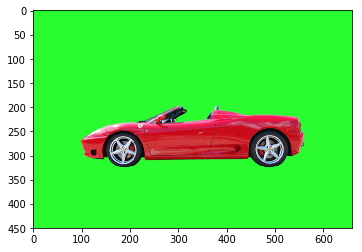

In [2]:
# Read in the image
car_image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', car_image.shape)

# Display the image
plt.imshow(car_image)

### Define the color threshold

In [3]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

### Create a mask

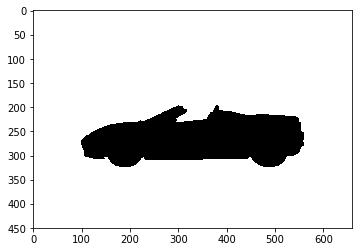

In [4]:
# Define the masked area
mask = cv2.inRange(car_image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

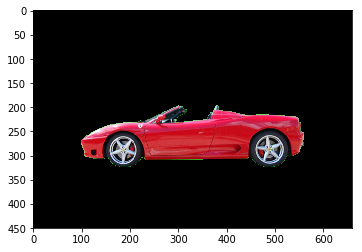

In [5]:
# Mask the image to let the car show through
masked_image = np.copy(car_image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

## TODO: Mask and add a background image

Oiriginal Bg Image shape:  (575, 1024, 3)


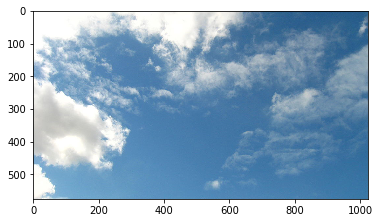

In [6]:
# Load in a background image, and convert it to RGB 
bg_image = mpimg.imread('images/sky.jpg')
print('Oiriginal Bg Image shape: ', bg_image.shape)
plt.imshow(bg_image)

After Bg image resized:  (450, 801, 3)


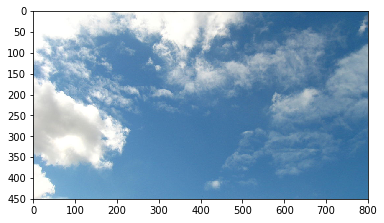

In [7]:
## TODO: Crop it or resize the background to be the right size (450x660)
# First resize to one dimension of car image, maintaining aspect ratio..
bg_image_ar = bg_image.shape[1]/bg_image.shape[0]
bg_image_resized = cv2.resize(bg_image, (int(bg_image_ar*450), 450))
print('After Bg image resized: ', bg_image_resized.shape)
plt.imshow(bg_image_resized)

After Bg image cropped:  (450, 660, 3)


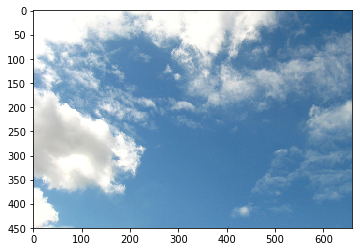

In [8]:
# then crop excess on other dimension, here 801 is excess of 660. 
row_crop = 0
col_crop = 141
bg_image_cropped = bg_image_resized[:, :-col_crop, :]
print('After Bg image cropped: ', bg_image_cropped.shape)
plt.imshow(bg_image_cropped)

Ok, now it has same image dimension as our car.

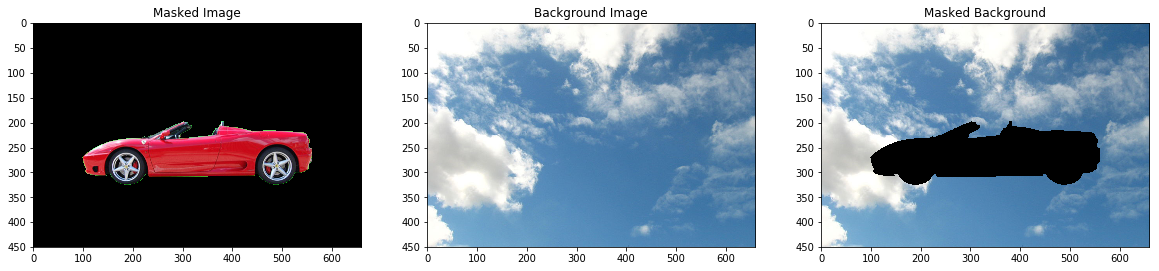

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

# masked_image , green background masked out
ax1.set_title('Masked Image')
ax1.imshow(masked_image)

# bg_image_cropped
ax2.set_title('Background Image')
ax2.imshow(bg_image_cropped)

# bg car area masked out
bg_mask = cv2.bitwise_not(mask)  # invert car mask
masked_bg = np.copy(bg_image_cropped) 
masked_bg[bg_mask != 0] = [0,0,0] # remove car area of background
ax3.set_title('Masked Background')
ax3.imshow(masked_bg)

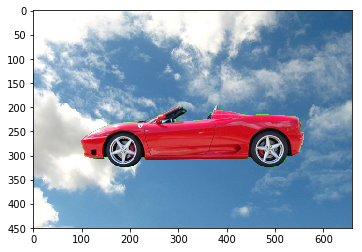

In [10]:
# let us add masked image and masked background now
result_image = cv2.add(masked_image,masked_bg)
plt.imshow(result_image)